In [1]:
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests


This dataset contains agricultural data for 1,000,000 samples aimed at predicting crop yield (in tons per hectare) based on various factors. The dataset can be used for regression tasks in machine learning, especially for predicting crop productivity.

* Region: The geographical region where the crop is grown (North, East, South, West).
* Soil_Type: The type of soil in which the crop is planted (Clay, Sandy, Loam, Silt, Peaty, Chalky).
* Crop: The type of crop grown (Wheat, Rice, Maize, Barley, Soybean, Cotton).
* Rainfall_mm: The amount of rainfall received in millimeters during the crop growth period.
* Temperature_Celsius: The average temperature during the crop growth period, measured in degrees Celsius.
* Fertilizer_Used: Indicates whether fertilizer was applied (True = Yes, False = No).
* Irrigation_Used: Indicates whether irrigation was used during the crop growth period (True = Yes, False = No).
* Weather_Condition: The predominant weather condition during the growing season (Sunny, Rainy, Cloudy).
* Days_to_Harvest: The number of days taken for the crop to be harvested after planting.
* Yield_tons_per_hectare: The total crop yield produced, measured in tons per hectare.

In [3]:
# Download dataset from Kaggle using api

!kaggle datasets download -d samuelotiattakorah/agriculture-crop-yield

Dataset URL: https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield
License(s): CC0-1.0
 99%|█████████████████████████████████████▌| 33.0M/33.4M [00:09<00:00, 4.35MB/s]
100%|██████████████████████████████████████| 33.4M/33.4M [00:09<00:00, 3.65MB/s]


In [4]:
# Unzip the data
!unzip agriculture-crop-yield.zip

Archive:  agriculture-crop-yield.zip
  inflating: crop_yield.csv          


In [62]:
# Lets read the dataset into a pnadas dataframe
df = pd.read_csv('data/crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [7]:
df.shape

(1000000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [9]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [3]:
# Check for null values
df.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

### Exploring Categorical features

         count  In Percentage
Region                       
North   250173          25.02
West    250074          25.01
South   250054          25.01
East    249699          24.97




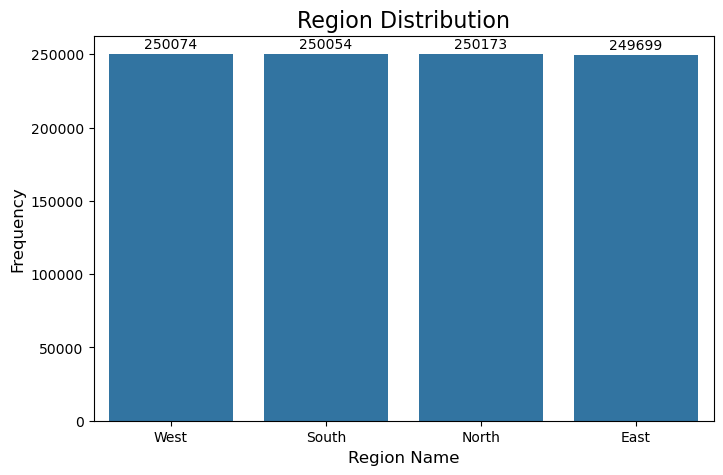



            count  In Percentage
Soil_Type                       
Sandy      167119          16.71
Loam       166795          16.68
Chalky     166779          16.68
Silt       166672          16.67
Clay       166352          16.64
Peaty      166283          16.63




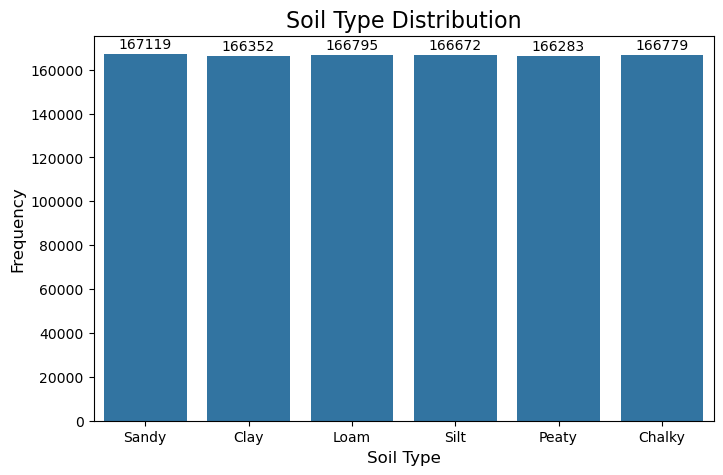



          count  In Percentage
Crop                          
Maize    166824          16.68
Rice     166792          16.68
Barley   166777          16.68
Wheat    166673          16.67
Cotton   166585          16.66
Soybean  166349          16.63




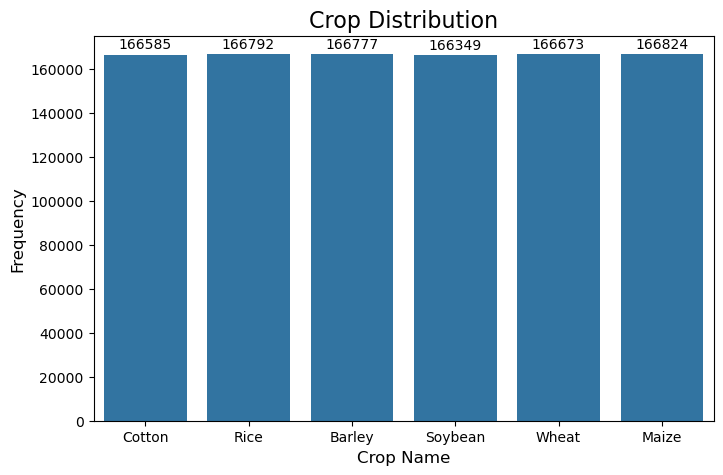



                    count  In Percentage
Weather_Condition                       
Sunny              333790          33.38
Rainy              333561          33.36
Cloudy             332649          33.26




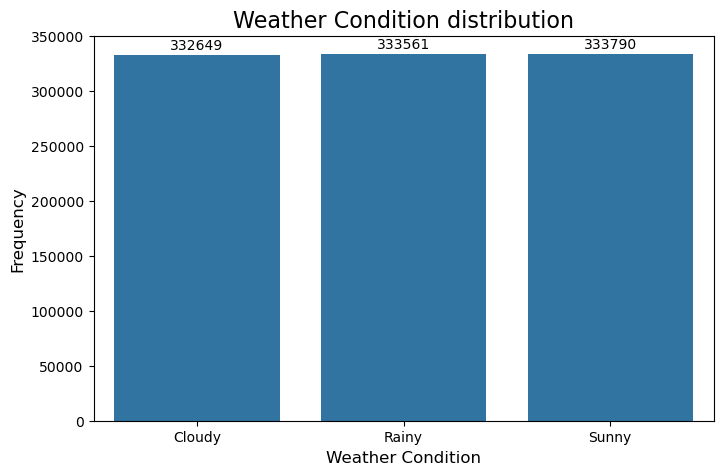

In [16]:
cat_features = df.select_dtypes(include = ['object'])
cat_x_label = ['Region Name' ,'Soil Type' ,'Crop Name' , 'Weather Condition']
cat_title = ["Region Distribution", "Soil Type Distribution" , "Crop Distribution" ,"Weather Condition distribution"]

for i , k in enumerate(cat_features):
    feature = df[k].value_counts().reset_index().sort_values(by ='count', ascending=False)
    feature['In Percentage'] = round(feature['count'] / df.shape[0] * 100,2)
    print(feature.set_index(k))
    print('\n')

    fig ,ax = plt.subplots(figsize = (8,5))
    sns.countplot(x=k , data=df ,ax =ax)
    ax.bar_label(ax.containers[0], padding=2 , color = 'black', fontsize = 10)
    ax.set_xlabel(cat_x_label[i], fontsize = 12)
    ax.set_ylabel("Frequency" , fontsize = 12)
    ax.set_title(cat_title[i], fontsize = 16)
    plt.show()
    print("\n")

### Observation
* All Categorical features are almost equally distrubuted.

### Exploring Numerical Features

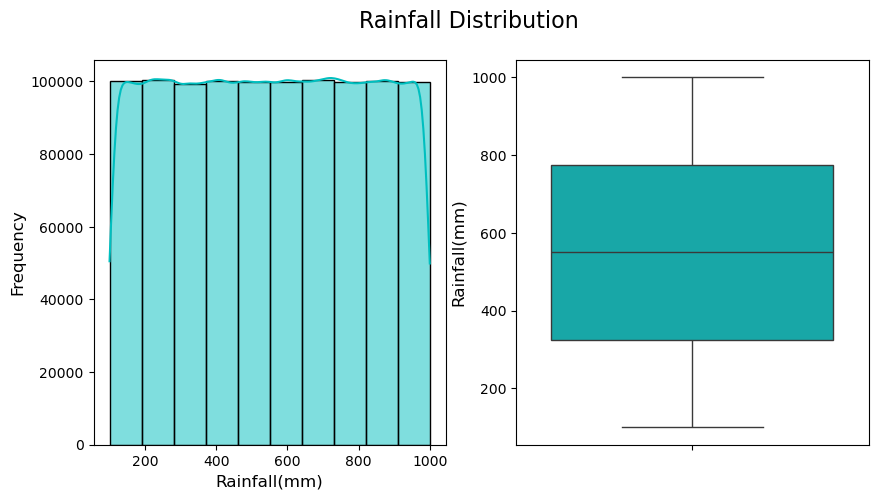

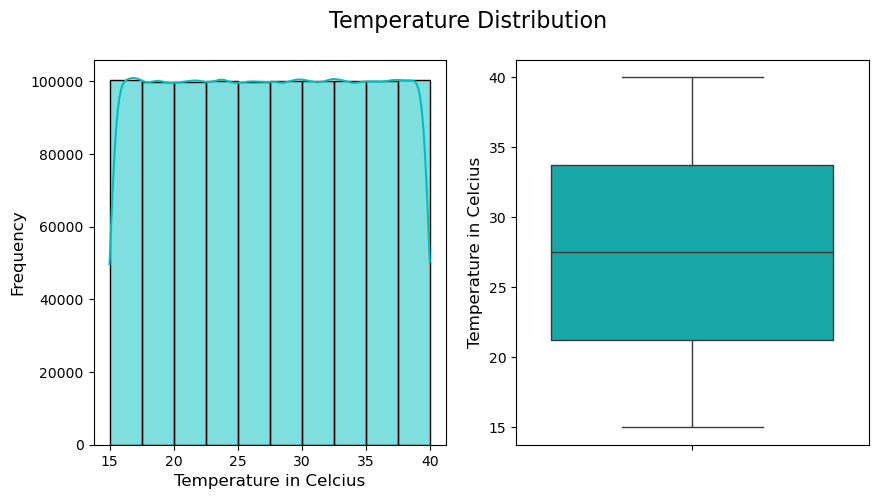

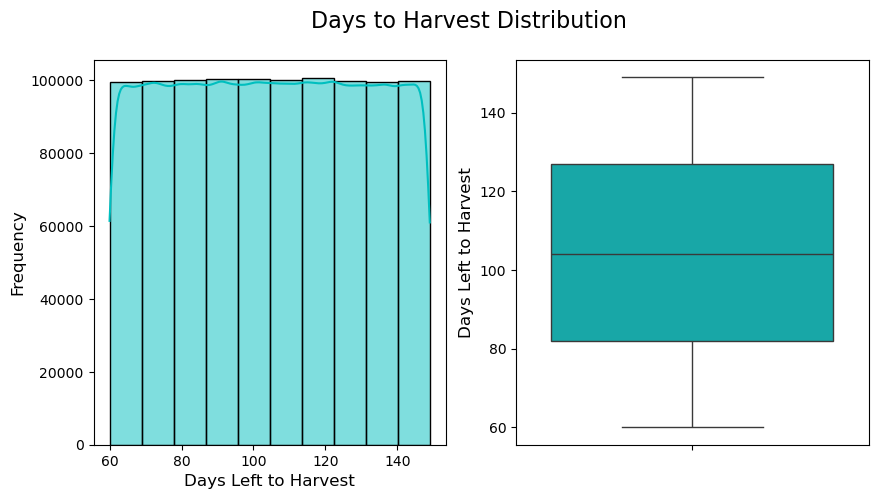

In [24]:
num_features = df.select_dtypes(include =['int64','float64']).drop('Yield_tons_per_hectare' , axis = 1)
num_x_label = ['Rainfall(mm)','Temperature in Celcius','Days Left to Harvest']
num_title = ["Rainfall Distribution", "Temperature Distribution", "Days to Harvest Distribution"]

for i , k in enumerate(num_features):
    fig ,ax = plt.subplots(1,2,figsize = (10,5))
    plt.suptitle(num_title[i],fontsize = 16)

    sns.histplot(x=k, data=df , kde=True , color="c",bins = 10 , ax =ax[0])
    ax[0].set_xlabel(num_x_label[i], fontsize= 12)
    ax[0].set_ylabel("Frequency" , fontsize = 12)

    sns.boxplot(y =k , data=df , color = "c", ax = ax[1])
    ax[1].set_ylabel(num_x_label[i], fontsize = 12)
    
    plt.subplots_adjust(wspace=0.2 ,hspace=0.8 )
    plt.show()

### Observation

* All the numerical columns are also equally distributed like the categorical features.
* No Outliers were seen for any of these columns.

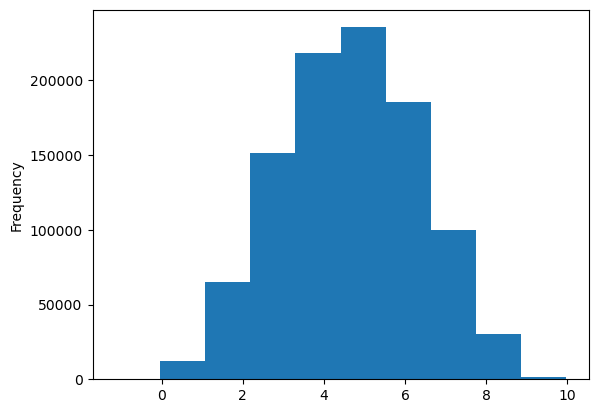

In [26]:
# Lets check distribution of Target Column
df.Yield_tons_per_hectare.plot(kind ='hist')
plt.show()

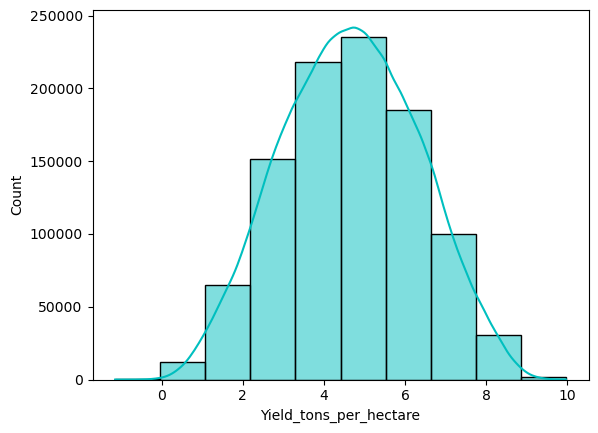

In [29]:
sns.histplot(x='Yield_tons_per_hectare', data=df , kde=True , color="c",bins = 10);

### Crop yield  is centered in between 3 - 6 .

In [33]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


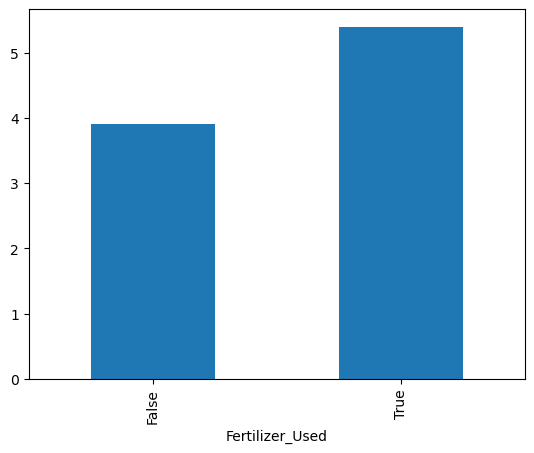

In [39]:
# Lets check the Fertilizer_Used column,Irrigation_Used  vs Target
df.groupby('Fertilizer_Used')['Yield_tons_per_hectare'].median().plot(kind = 'bar')

plt.show()

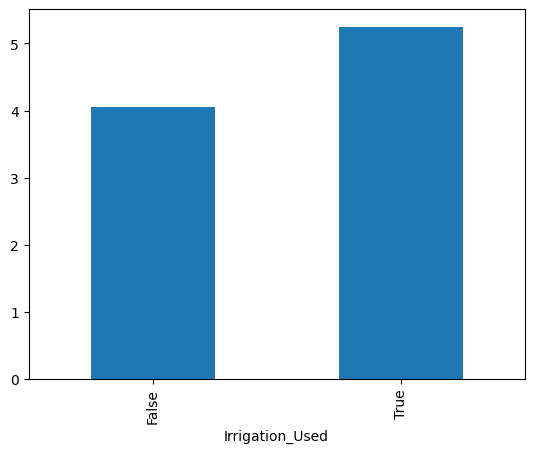

In [41]:
df.groupby('Irrigation_Used')['Yield_tons_per_hectare'].median().plot(kind = 'bar')
plt.show()

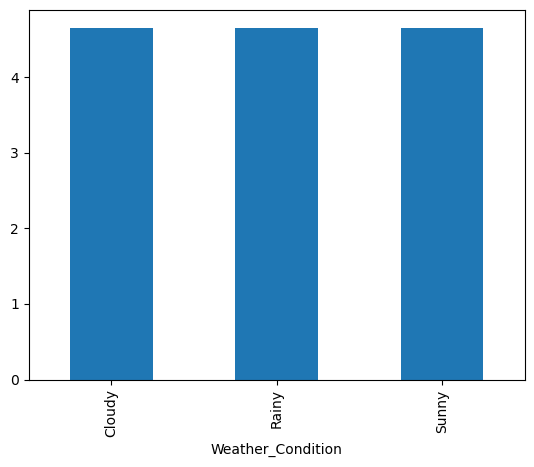

In [42]:
# Check the same for Weather_Condition  and Soil_Type
df.groupby('Weather_Condition')['Yield_tons_per_hectare'].median().plot(kind = 'bar')
plt.show()

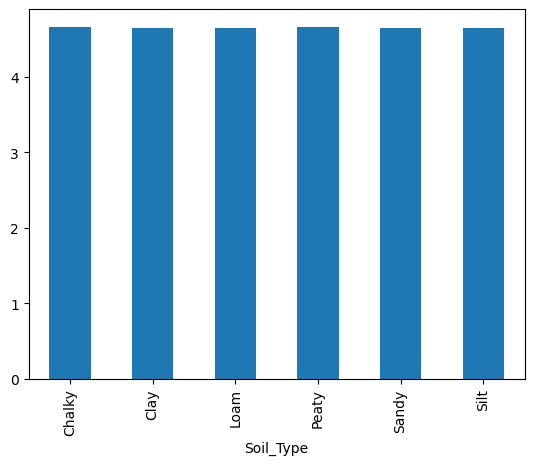

In [43]:
# Soil Type
df.groupby('Soil_Type')['Yield_tons_per_hectare'].median().plot(kind = 'bar')
plt.show()

### Observations
* Crop Productivity is tends be increased if Fertilizer or Irrigation Used , which is expected.

In [63]:
# Convert Fertilizer_Used,Irrigation_Used into numbers

df.Fertilizer_Used = df.Fertilizer_Used.astype(int)
df.Irrigation_Used = df.Irrigation_Used.astype(int)

In [59]:
# Lest do the same for other Categorical features
# As we have very few type of Categorical feature we can do manual encoding for the analysis purpose
# for col , content in df.items():
#     if df[col].dtype == 'object':
#         columns = df[col].unique()
#         for i , k in enumerate(columns):
#             df[col].replace({k :i}, inplace=True)

In [65]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


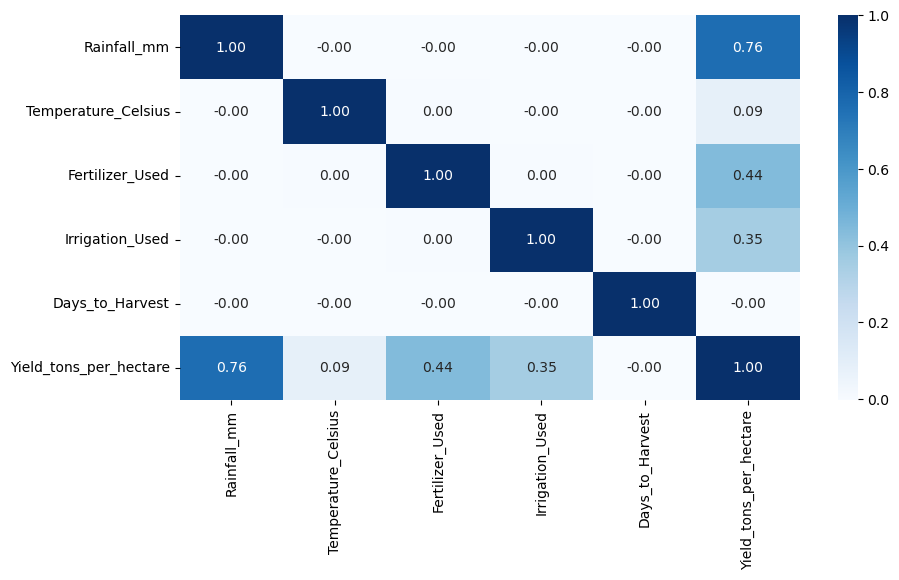

In [64]:
# Correlation Analysis 
num_df = df.select_dtypes(include = ['float64','int64'])
corr = num_df.corr()
fig = plt.subplots(figsize= (10,5))
sns.heatmap(corr , annot=True , cmap='Blues', fmt=".2f")
plt.show()

### Observation
* Rainfall_m has a strong correlation with target column with ~ 76% , as expected Rainfall is very crucial for agriculture.
* Fertilizer and Irrigation used has correlation with 44% and 35% , which we have seen earlier also that crop productivity tends to improve if these used.
* Rest two columns are less correlated , which is unexpected atleast Temperature column should have some correlation as we know it is very important to have suitable weather for agriculture.

### conclusion

1. During the model training we can drop Days to harvest column as it has no correlation with target.

